#Muhammad Daffa' Ibrahim
###1301204051


##Scotch Whisky Reviews Datasets

###Data Preparation

In [28]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
df = pd.read_csv("scotch_review.csv")

In [110]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(df.category.unique()), 
                                                                           ", ".join(df.category.unique()[0:5])))


There are 2247 observations and 5 features in this dataset. 

There are 5 types of wine in this dataset such as Blended Scotch Whisky, Single Malt Scotch, Blended Malt Scotch Whisky, Grain Scotch Whisky, Single Grain Whisky... 



In [53]:
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.drop(columns=["currency"], axis=1, inplace=True)


In [109]:
df.head()

,name,category,review.point,price,description
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,"Magnificently powerful and intense. Caramels, ..."
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,What impresses me most is how this whisky evol...
2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,There have been some legendary Bowmores from t...
3,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,With a name inspired by a 1926 Buster Keaton m...
4,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,"Captivating, enticing, and wonderfully charmin..."


In [55]:
whisky = df.groupby("category")
whisky.describe().head()

review.point                                   \
                                  count       mean       std   min   25%   
category                                                                   
Blended Malt Scotch Whisky        132.0  87.659091  4.127416  77.0  85.0   
Blended Scotch Whisky             211.0  87.236967  4.174841  76.0  84.0   
Grain Scotch Whisky                28.0  86.500000  5.036901  72.0  84.0   
Single Grain Whisky                57.0  85.508772  4.188090  77.0  83.0   
Single Malt Scotch               1819.0  86.608576  3.999127  63.0  84.0   

                                              
                             50%   75%   max  
category                                      
Blended Malt Scotch Whisky  88.0  91.0  96.0  
Blended Scotch Whisky       87.0  90.0  97.0  
Grain Scotch Whisky         87.0  90.0  96.0  
Single Grain Whisky         86.0  88.0  93.0  
Single Malt Scotch          87.0  89.0  97.0

In [56]:
whisky.mean().sort_values(by="review.point",ascending=False).head()

,review.point
category,
Blended Malt Scotch Whisky,87.659091
Blended Scotch Whisky,87.236967
Single Malt Scotch,86.608576
Grain Scotch Whisky,86.500000
Single Grain Whisky,85.508772


**Show Number of Whisky Based on each Category**

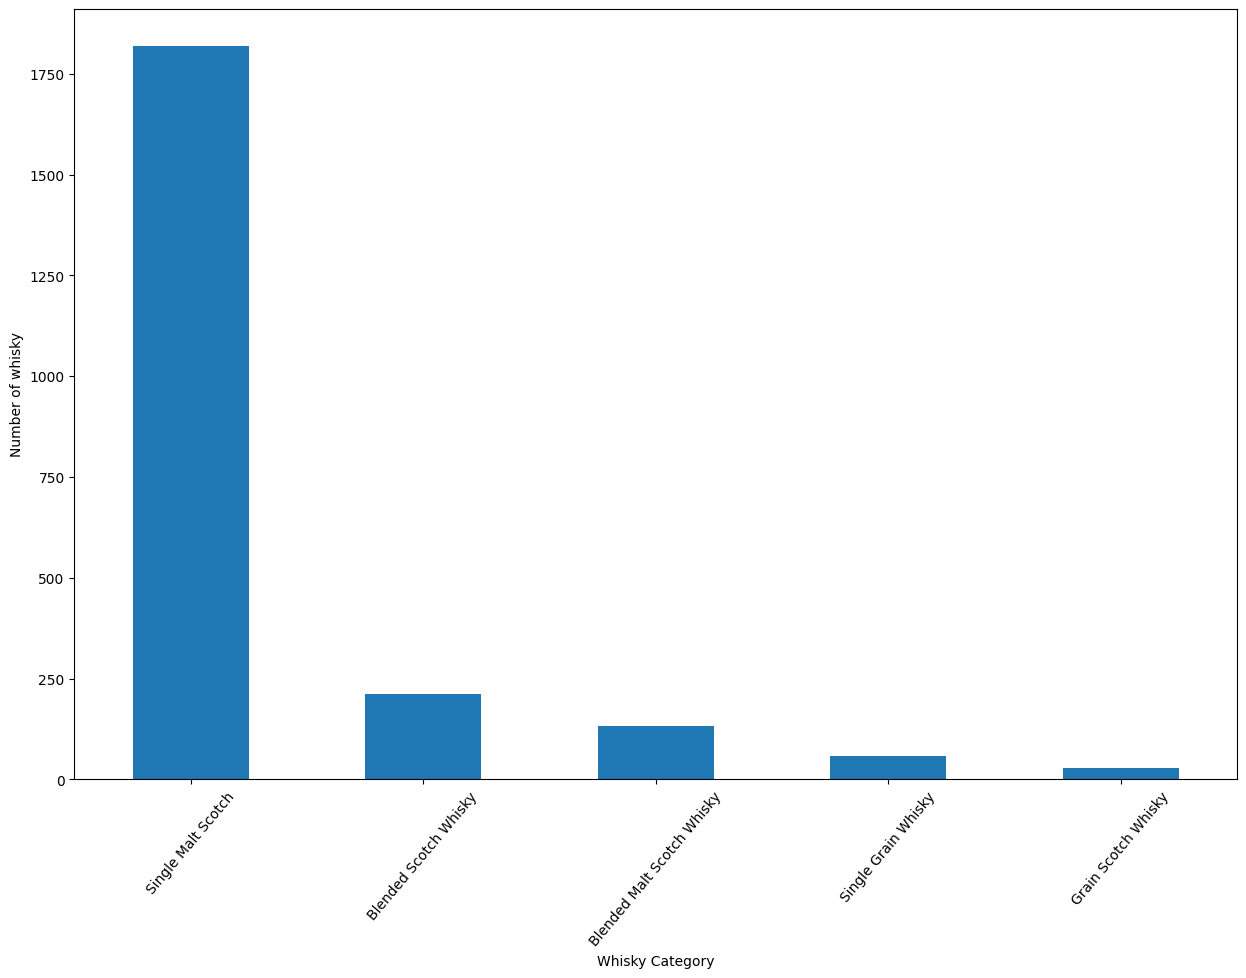

In [68]:
plt.figure(figsize=(15,10))
whisky.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Whisky Category")
plt.ylabel("Number of whisky")
plt.show()

**Mean Review Point based on each Category**

<Figure size 1500x1000 with 0 Axes>

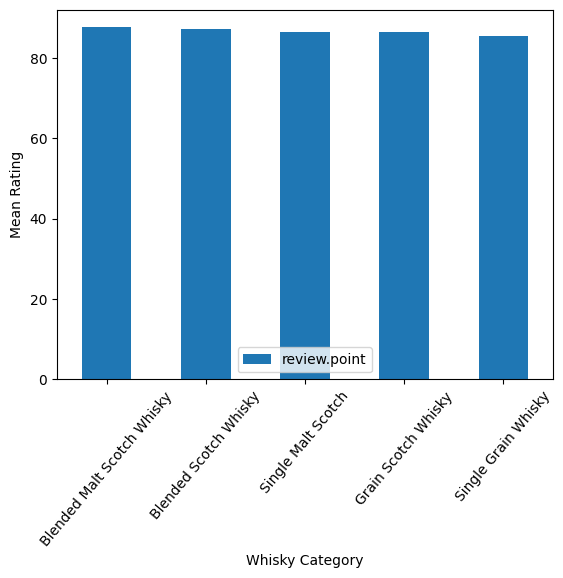

In [69]:
plt.figure(figsize=(15,10))
whisky.mean().sort_values(by="review.point",ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Whisky Category")
plt.ylabel("Mean Rating")
plt.show()

###Words Visualization

In [ ]:
?WordCloud

In [ ]:
df_blended_scotch_whisky = df[df["category"] == "Blended Scotch Whisky"]
df_Single_Malt_Scotch = df[df["category"] == "Single Malt Scotch"]
df_Blended_Malt_Scotch_Whisky = df[df["category"] == "Blended Malt Scotch Whisky"]
df_Grain_Scotch_Whisky = df[df["category"] == "Grain Scotch Whisky"]
df_Single_Grain_Whisky = df[df["category"] == "Single Grain Whisky"]

**Words Visualization First Review**

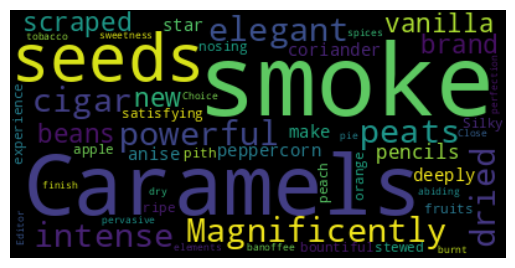

In [75]:
# Start with one review:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Words Visualization of Review in Blended Scotch Whisky Category**

There are 96135 words in the combination of all review.


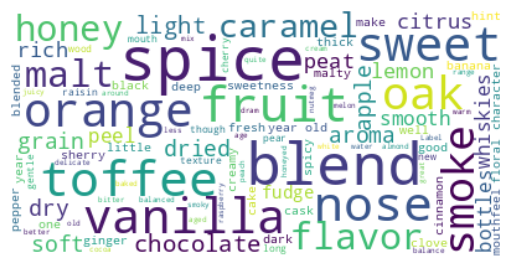

In [106]:
text = " ".join(review for review in df_blended_scotch_whisky.description)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create and generate a word cloud image:
stopwords = set(STOPWORDS)
stopwords.update(["whisky", "finish", "S" , "bottle", "palate", "note", "notes"])
wordcloud = WordCloud(stopwords = stopwords, max_font_size=50, max_words=100, background_color = "white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Words Visualization of Review in Single Malt Scotch Category**

There are 793772 words in the combination of all review.


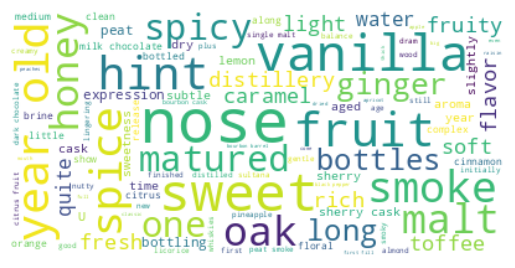

In [104]:
text = " ".join(review for review in df_Single_Malt_Scotch.description)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create and generate a word cloud image:
stopwords = set(STOPWORDS)
stopwords.update(["whisky", "finish", "S" , "bottle", "palate", "note", "notes"])
wordcloud = WordCloud(stopwords = stopwords, max_font_size=50, max_words=100, background_color = "white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Words Visualization of Review in Blended Malt Scitch Category**

There are 59348 words in the combination of all review.


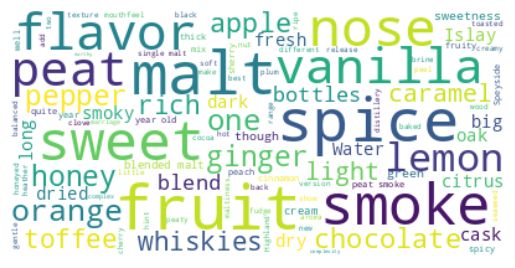

In [103]:
text = " ".join(review for review in df_Blended_Malt_Scotch_Whisky.description)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create and generate a word cloud image:
stopwords = set(STOPWORDS)
stopwords.update(["whisky", "finish", "S" , "bottle", "palate", "note", "notes"])
wordcloud = WordCloud(stopwords = stopwords, max_font_size=50, max_words=100, background_color = "white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Words Visualization of Review in Grain Scotch Whisky Category**

There are 12714 words in the combination of all review.


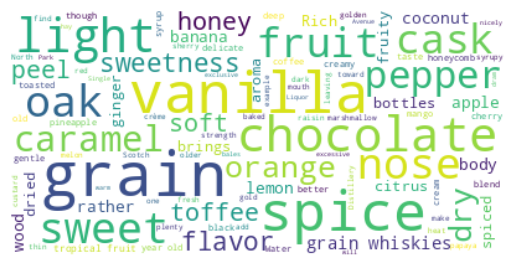

In [102]:
text = " ".join(review for review in df_Grain_Scotch_Whisky.description)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create and generate a word cloud image:
stopwords = set(STOPWORDS)
stopwords.update(["whisky", "finish", "S" , "bottle", "palate", "note", "notes"])
wordcloud = WordCloud(stopwords = stopwords, max_font_size=50, max_words=100, background_color = "white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Words Visualization of Review in Single Grain Whisky Category**

There are 27453 words in the combination of all review.


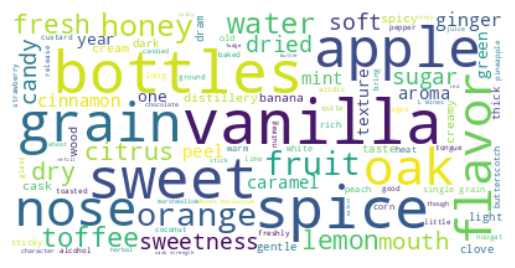

In [107]:
text = " ".join(review for review in df_Single_Grain_Whisky.description)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create and generate a word cloud image:
stopwords = set(STOPWORDS)
stopwords.update(["whisky", "finish", "S" , "bottle", "palate", "note", "notes"])
wordcloud = WordCloud(stopwords = stopwords, max_font_size=50, max_words=100, background_color = "white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Words Visualization of all Review in Datasets**

There are 989426 words in the combination of all review.


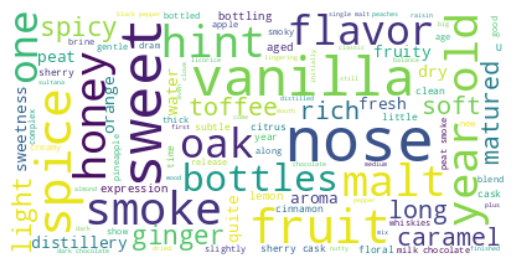

In [108]:
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create and generate a word cloud image:
stopwords = set(STOPWORDS)
stopwords.update(["whisky", "finish", "S" , "bottle", "palate", "note", "notes"])
wordcloud = WordCloud(stopwords = stopwords, max_font_size=50, max_words=100, background_color = "white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Berdasarkan hasil visualisasi dari kata-kata hasil review tersebut, dapat disimpulkan bahwa setiap kategori memiliki persamaan dan ciri khasnya masing-masing, seperti terdapat kata vanilla pada setiap kategori whisky menandakan bahwa kelima whisky tersebut memiliki hubungan dengan vanilla meskipun mungkin saja setiap kategori memiliki hubungan ang berbeda-beda.


Selanjutnya dapat dilihat karakteristik whisky masing-masing kategori berdasarkan words visualization diatas, seperti Blended scotch memiliki kesan sweet, kemudian single malt scotch memiliki kesan lebih tua dan dewasa, Blended malt scotch memiliki kesan aroma dan rasa yang unik, grain scotch terkesan whisky yang ringan, dan single grain scotch terkesan memiliki aroma dan rasa yang manis